In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

Подключаем все нужные библиотеки

In [ ]:
np.random.seed(0)
l = 100
n = 3
X1 = np.array([[-1,-1,1]]) + 0.5*np.random.randn(l, n)
X2 = np.array([[1,1,1]]) + 0.5*np.random.randn(l, n)
X3 = np.array([[-1,1,1]]) + 0.5*np.random.randn(l, n)

X = np.vstack([X1, X2, X3])
y = np.hstack([[0]*l, [1]*l, [2]*l])

Организовали синтетическую выборку с количеством признаков равным n (улучшили задачу чтобы зеленая линия сместилась вверх за счет добавленного нами признака и улучшила нам резулльтат)

In [ ]:
cols = ['blue', 'red', 'green']
    
models = []
model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, np.array(y==0, dtype=np.int64))
models.append(model)
 
model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, np.array(y==1, dtype=np.int64))
models.append(model)
 
model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, np.array(y==2, dtype=np.int64))
models.append(model)

Данные метод основан на том, что для классификации на $M>2$ классов нужно построить $M$ линейных классификаторов, которые классифицируют $k$-й класс прорив всех остальных классов.

Построим $M=3$ классификатора, которые отделяют каждый класс от двух остальных

In [ ]:
plt.xlim((-2.5, 2.5))
plt.ylim((-2.5, 2.5))
 
# построение точек
for k in np.unique(y):
    plt.plot(X[y==k,0], X[y==k,1], 'o', label='класс {}'.format(k), color=cols[k])
 
# построение прямой перпендикулярной к разделяющей
for k in np.unique(y):
    # нормальный вектор к прямой
    x2, y2 = -models[k].coef_[0][1]/models[k].coef_[0][0], 1
    
    polynomial = np.poly1d(np.polyfit([0, x2], [0, y2], 1))
    x_axis = np.linspace(-10, 10)
    #прибавили коэффициент, который получился засчет дополнительного коэффициента
    y_axis = polynomial(x_axis) + models[k].coef_[0][2]
    plt.plot(x_axis, y_axis, linewidth=2, color=cols[k])
 
plt.legend(loc='best')
plt.show()

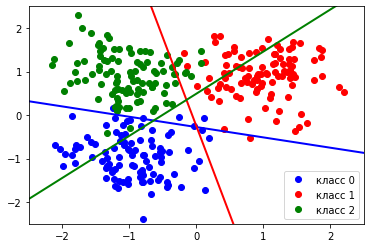